# Distributed Reinforcement Learning and Large Scale Data Collection for Supervised Deep Learning Models

This project involves training two deep learning models with a single hidden layer with the size of eight neurons. The model input is given by the distance to the target given as a single float value, and output prediction is the force needed to throw the ball towards the target. It is therefore a regression task I am trying to solve.

In [10]:
import numpy as np
from matplotlib import pyplot as plt

### Reinforcement Learning Results

The reinforcement learning results did not go as planned, as it has been hard to translate the reinforcement learning papers from the multi-class classification tasks from a sequence of actions that they are trying solve into the, granted, rather simple task of throwing the ball towards the goal. It seems like it needs a lot of different tricks in order to get reinforcement learning models to train correctly, and this shows that I have not been able to translate these correctly.

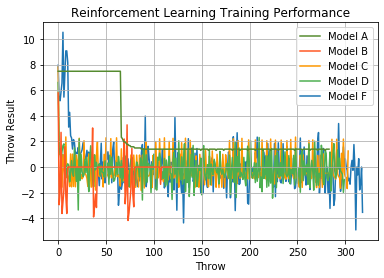

In [11]:
from itertools import islice, chain
from typing import List

import pandas as pd


def iter_chunks(seq, chunk_size):
    it = iter(seq)
    while True:
        chunk = list(islice(it, chunk_size))
        if chunk:
            yield chunk
        else:
            break


def mean_result(data: List[float], amount: int = 8):
    results = []
    for ite in iter_chunks(data, amount):
        results.append(np.mean(np.array(ite)))
    return results


d_1c_0001 = pd.read_csv('./rl/throws_1c_0.0001.csv', delimiter=';').to_numpy()
d_1c_001 = pd.read_csv('./rl/throws_1c_0.001.csv', delimiter=';').to_numpy()
d_8c_001 = pd.read_csv('./rl/throws_8c_0.001.csv', delimiter=';').to_numpy()
d_r_8c_001 = pd.read_csv('./rl/throws_r_8c_0.001.csv', delimiter=';').to_numpy()
d_r_4c_0001 = pd.read_csv('./throws.csv', delimiter=';').to_numpy()

plt.figure(1)
plt.plot(d_1c_0001[:, 2], label='Model A', zorder=4, color='#558B2F')
plt.plot(d_1c_001[:, 2], label='Model B', zorder=3, color='#FF5722')
plt.plot(mean_result(d_8c_001[:, 2]), label='Model C', zorder=1, color='#FF9800')
plt.plot(mean_result(d_r_8c_001[:2400, 2]), label='Model D', zorder=1, color='#4CAF50')
plt.plot(mean_result(d_r_4c_0001[:, 2], 4), label='Model F', zorder=0)
plt.grid(True)
plt.title('Reinforcement Learning Training Performance')
plt.xlabel('Throw')
plt.ylabel('Throw Result')
plt.legend()
plt.show()

The models does not seem to stabilize and achieve the needed accuracy. Tuning the hpyer parameters did not seem to help, so more reinforcement learning tricks must be applied in order to get the models to learn correctly.

### Supervised Learning Results

In order to show that I could succesfully train a deep learning model using more traiditional techniques, I used to the distributed framework to gather data and train the deep learning model using that data. The distributed framework was then used to evaluate the trained model. The task is the same as the one described in the description.

It may be trivial, but when gathering data for time intensive tasks it can be quite time intensive as well to just gather the data. Using the distributed framework, it was possible to gather data much faster by utilizing multiple clients to gather succesful throws

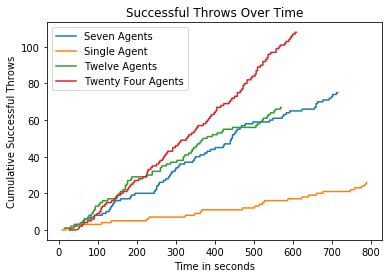

In [13]:

files = [['seven_agents.csv', 'Seven Agents'],
         ['single_agent.csv', 'Single Agent'],
         ['twelve_agents.csv', 'Twelve Agents'],
         ['twentyfour_agents.csv', 'Twenty Four Agents']]


def create_plt_data(data):
    count = 0
    y = []
    x = []
    for d in data:
        if d[2] < 1:
            count += 1
        x.append(d[3])
        y.append(count)
    return x, y


def plot_csv_data(file_names):
    plt.figure()
    for f in file_names:
        data = pd.read_csv('./supervised_data/' + f[0], delimiter=';').to_numpy()
        x, y = create_plt_data(data)
        plt.plot(x, y, label=f[1])
    plt.title('Successful Throws Over Time')
    plt.xlabel('Time in seconds')
    plt.ylabel('Cumulative Successful Throws')
    plt.legend()
    plt.show()


plot_csv_data(files)

And then using the 698 succesful throws from multiple distances to train the model. I tried one model with learning rate of 0.0001 over 150 and one with 0.001 trained over 60 epochs. Both using stochastic gradient descent with no momentum.

![title](data/supervised_loss.svg)

![title](data/supervised_loss_v2.svg)

Shown above is the two models training loss. It clearly visible the latter being the one with the lower learning rate, achieving only around 50% accuracy while the first model achieves 100% accuracy in training and also converges faster.

### Short Conclusion

Even though it was not possible to train the deep learning model using reinforcement learning succesfully, the distributed framework showed its use when collecting data for a supervised learning dataset. I do still think the distributed framework has a use for training or gathering data for time intensive tasks, but future analysis would need to be made in order to prove this concrectly.